In [1]:
import numpy as np
import pandas as pd
import os
import random
import matplotlib.image as mping
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

In [11]:
TrainingImagePath="D:/Image/test"
TestImagePath="D:/Image/train"
ValidationImagePath="D:/Image/valid"

In [12]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

In [13]:
test_datagen = ImageDataGenerator(rescale=1./255)
training_set = train_datagen.flow_from_directory(
    TrainingImagePath,
    target_size=(128,128),
    batch_size=32,
    class_mode="categorical"
)

Found 65 images belonging to 13 classes.


In [14]:
test_set = test_datagen.flow_from_directory(
    TestImagePath,
    target_size = (128,128),
    batch_size=32,
    class_mode="categorical"
)
valid_set = test_datagen.flow_from_directory(
    ValidationImagePath,
    target_size=(128,128),
    batch_size=32,
    class_mode="categorical"
)

Found 650 images belonging to 13 classes.
Found 65 images belonging to 13 classes.


In [29]:
def showImages(class_name):
  random_index = random.choice(list(range(1,49)))
  folder_path = os.path.join(TrainingImagePath, class_name)
  try:
    image_path = os.path.join(folder_path,str(random_index).zfill(3)+".jpg")
    plt.imshow(mping.imread(image_path))
  except:
    image_path = os.path.join(folder_path,str(random_index).zfill(2)+".jpg")
    plt.imshow(mping.imread(image_path))
  plt.title(class_name)
  plt.axis(False)
    

IndentationError: unexpected indent (Temp/ipykernel_12476/2029899789.py, line 12)

FileNotFoundError: [Errno 2] No such file or directory: 'D:/Image/test\\american football\\32.jpg'

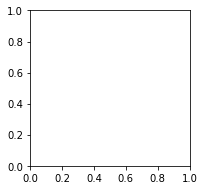

In [30]:
plt.figure(figsize = (20,20))
for labels,number in training_set.class_indices.items():
  plt.subplot(6,6,number+1)
  showImages(labels)
test_set.class_indices

In [17]:
TrainClasses=training_set.class_indices
ResultMap={}
for ballValue,ballName in zip(TrainClasses.values(),TrainClasses.keys()):
    ResultMap[ballValue]=ballName

In [18]:
import pickle
with open(R"ResultsMap.pkl", 'wb') as f:
    pickle.dump(ResultMap, f, pickle.HIGHEST_PROTOCOL)
print("Mapping of Face and its ID",ResultMap)
OutputNeurons=len(ResultMap)
print('\n The Number of output neurons: ', OutputNeurons)

Mapping of Face and its ID {0: 'american football', 1: 'baseball', 2: 'basketball', 3: 'beachballs', 4: 'billiard ball', 5: 'bowling ball', 6: 'cricket ball', 7: 'eyeballs', 8: 'football', 9: 'golf ball', 10: 'marble', 11: 'tennis ball', 12: 'volley ball'}

 The Number of output neurons:  13


In [19]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense



In [20]:
classifier= Sequential()
classifier.add(Convolution2D(32, kernel_size=(3, 3), strides=(1, 1), input_shape=(128,128,3), activation='relu'))
classifier.add(MaxPool2D(pool_size=(2,2)))
classifier.add(Convolution2D(64, kernel_size=(3, 3), strides=(1, 1), activation='relu'))
classifier.add(MaxPool2D(pool_size=(2,2)))
classifier.add(Flatten())
classifier.add(Dense(256, activation='relu'))
classifier.add(Dense(OutputNeurons, activation='softmax'))
classifier.compile(loss='categorical_crossentropy', optimizer = 'rmsprop', metrics=["accuracy"])

In [21]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dense (Dense)               (None, 256)               1

In [22]:
import time
StartTime=time.time()
model_history=classifier.fit_generator(
                                        training_set,
                                        steps_per_epoch=len(training_set),
                                        epochs=20,
                                        validation_data=valid_set,
                                        validation_steps=len(valid_set),
                                        verbose=1)
EndTime=time.time()
print("############### Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes #############')

C:\Users\SHIVAM\AppData\Local\Temp/ipykernel_12476/3489725090.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_history=classifier.fit_generator(


Epoch 1/20
3/3 [==============================] - 4s 1s/step - loss: 39.9108 - accuracy: 0.0769 - val_loss: 10.7408 - val_accuracy: 0.0769
Epoch 2/20
3/3 [==============================] - 2s 569ms/step - loss: 8.2272 - accuracy: 0.0615 - val_loss: 4.1562 - val_accuracy: 0.0769
Epoch 3/20
3/3 [==============================] - 2s 531ms/step - loss: 3.3865 - accuracy: 0.0462 - val_loss: 2.4763 - val_accuracy: 0.2000
Epoch 4/20
3/3 [==============================] - 1s 647ms/step - loss: 2.2270 - accuracy: 0.2923 - val_loss: 2.3395 - val_accuracy: 0.2000
Epoch 5/20
3/3 [==============================] - 2s 654ms/step - loss: 3.4500 - accuracy: 0.1692 - val_loss: 2.2847 - val_accuracy: 0.2000
Epoch 6/20
3/3 [==============================] - 2s 516ms/step - loss: 2.4626 - accuracy: 0.3538 - val_loss: 2.2567 - val_accuracy: 0.1538
Epoch 7/20
3/3 [==============================] - 2s 687ms/step - loss: 1.7559 - accuracy: 0.4308 - val_loss: 2.1465 - val_accuracy: 0.2000
Epoch 8/20
3/3 [=====

In [23]:
accuracy = model_history.history['accuracy']
val_accuracy  = model_history.history['val_accuracy']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

Text(0.5, 1.0, 'Training vs validation accuracy')

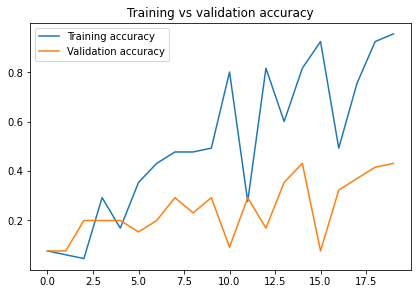

In [24]:
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
plt.plot(accuracy, label = "Training accuracy")
plt.plot(val_accuracy, label="Validation accuracy")
plt.legend()
plt.title("Training vs validation accuracy")

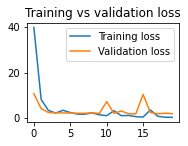

In [25]:
plt.subplot(2,2,2)
plt.plot(loss, label = "Training loss")
plt.plot(val_loss, label="Validation loss")
plt.legend()
plt.title("Training vs validation loss")
plt.show()